## Import Data

In [289]:
# Import CMIP6 datasets

import xarray as xr
from glob import glob

ACCESS_ESM1_5 = xr.open_mfdataset(glob('Project_Data/chlos_Omon_ACCESS-ESM1-5_ssp245*.nc'), combine='by_coords') #kg m-3
CanESM5_1 = xr.open_mfdataset(glob('Project_Data/chlos_Omon_CanESM5-1_ssp245*.nc'), combine='by_coords') #kg m-3
CESM2_WACCM = xr.open_mfdataset(glob('Project_Data/chlos_Omon_CESM2-WACCM_ssp245*.nc'), combine='by_coords') #kg m-3
CMCC_ESM2 = xr.open_mfdataset(glob('Project_Data/chlos_Omon_CMCC-ESM2_ssp245*.nc'), combine='by_coords') #kg m-3
GFDL_ESM4 = xr.open_mfdataset(glob('Project_Data/chlos_Omon_GFDL-ESM4_ssp245*.nc'), combine='by_coords') #kg m-3
KIOST_ESM = xr.open_mfdataset(glob('Project_Data/chlos_Omon_KIOST-ESM_ssp245*.nc'), combine='by_coords') #kg m-3
MPI_ESM1_2_HR = xr.open_mfdataset(glob('Project_Data/chlos_Omon_MPI-ESM1-2-HR_ssp245*.nc'), combine='by_coords') #kg m-3
MPI_ESM1_2_LR = xr.open_mfdataset(glob('Project_Data/chlos_Omon_MPI-ESM1-2-LR_ssp245*.nc'), combine='by_coords') #kg m-3
NorESM2_LM = xr.open_mfdataset(glob('Project_Data/chlos_Omon_NorESM2-LM_ssp245*.nc'), combine='by_coords') #kg m-3
NorESM2_MM = xr.open_mfdataset(glob('Project_Data/chlos_Omon_NorESM2-MM_ssp245*.nc'), combine='by_coords') #kg m-3

## Check Data Structure

<xarray.Dataset> Size: 268MB
Dimensions:    (time: 1032, bnds: 2, lon: 360, lat: 180)
Coordinates:
  * time       (time) object 8kB 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
  * lon        (lon) float64 3kB 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat        (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 17kB dask.array<chunksize=(1, 2), meta=np.ndarray>
    chlos      (time, lat, lon) float32 267MB dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
Attributes: (12/51)
    CDI:                       Climate Data Interface version 2.0.4 (https://...
    source:                    NorESM2-MM (2017): \naerosol: OsloAero\natmos:...
    institution:               NorESM Climate modeling Consortium consisting ...
    Conventions:               CF-1.7 CMIP-6.2
    activity_id:               ScenarioMIP
    branch_method:             Hybrid-restart from year 2015-01-01 of h

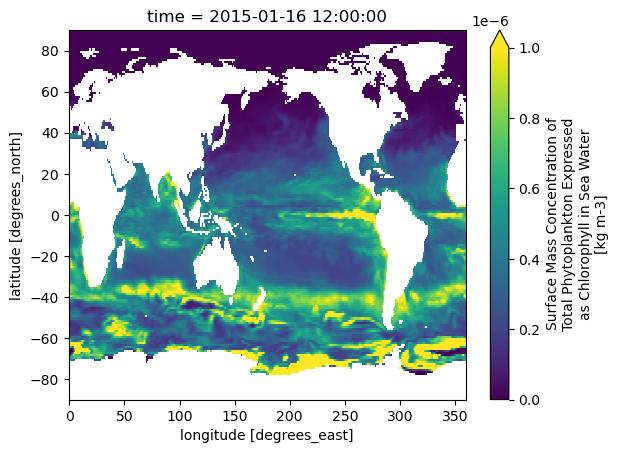

In [6]:
# Note: repeat these steps for all datasets!

# Print overview of datasets
print(NorESM2_MM)

# Print chlos units (note: all models have the same units)
print(NorESM2_MM.chlos.units)

# Check data structure
NorESM2_MM.chlos

# Plot chlos
import matplotlib.pyplot as plt
NorESM2_MM.chlos[0].plot(vmin=0, vmax=0.000001);

## Plot chlos anomalies

In [7]:
# Plot chlos anomalies
# Model names, for reference: ACCESS_ESM1_5, CanESM5_1, CESM2_WACCM, CMCC_ESM2, GFDL_ESM4, KIOST_ESM, MPI_ESM1_2_HR, MPI_ESM1_2_LR, NorESM2_LM, NorESM2_MM

import pandas as pd
from datetime import datetime

# Fix time axis 
ACCESS_ESM1_5 = ACCESS_ESM1_5.assign_coords({'time': pd.date_range(start=datetime(year=2015, month=1, day=31), end=datetime(year=2100, month=12, day=31), freq='1ME')})
CanESM5_1 = CanESM5_1.assign_coords({'time': pd.date_range(start=datetime(year=2015, month=1, day=31), end=datetime(year=2100, month=12, day=31), freq='1ME')})
CESM2_WACCM = CESM2_WACCM.assign_coords({'time': pd.date_range(start=datetime(year=2015, month=1, day=31), end=datetime(year=2100, month=12, day=31), freq='1ME')})
CMCC_ESM2 = CMCC_ESM2.assign_coords({'time': pd.date_range(start=datetime(year=2015, month=1, day=31), end=datetime(year=2100, month=12, day=31), freq='1ME')})
GFDL_ESM4 = GFDL_ESM4.assign_coords({'time': pd.date_range(start=datetime(year=2015, month=1, day=31), end=datetime(year=2100, month=12, day=31), freq='1ME')})
KIOST_ESM = KIOST_ESM.assign_coords({'time': pd.date_range(start=datetime(year=2015, month=1, day=31), end=datetime(year=2100, month=12, day=31), freq='1ME')})
MPI_ESM1_2_HR = MPI_ESM1_2_HR.assign_coords({'time': pd.date_range(start=datetime(year=2015, month=1, day=31), end=datetime(year=2100, month=12, day=31), freq='1ME')})
MPI_ESM1_2_LR = MPI_ESM1_2_LR.assign_coords({'time': pd.date_range(start=datetime(year=2015, month=1, day=31), end=datetime(year=2100, month=12, day=31), freq='1ME')})
NorESM2_LM = NorESM2_LM.assign_coords({'time': pd.date_range(start=datetime(year=2015, month=1, day=31), end=datetime(year=2100, month=12, day=31), freq='1ME')})
NorESM2_MM = NorESM2_MM.assign_coords({'time': pd.date_range(start=datetime(year=2015, month=1, day=31), end=datetime(year=2100, month=12, day=31), freq='1ME')})


# Average chlos across the two time periods
# START
ACCESS_ESM1_5_start = ACCESS_ESM1_5.chlos.where((ACCESS_ESM1_5.time.dt.year >= 2015)*(ACCESS_ESM1_5.time.dt.year < 2025)).mean(dim='time')
CanESM5_1_start = CanESM5_1.chlos.where((CanESM5_1.time.dt.year >= 2015)*(CanESM5_1.time.dt.year < 2025)).mean(dim='time')
CESM2_WACCM_start = CESM2_WACCM.chlos.where((CESM2_WACCM.time.dt.year >= 2015)*(CESM2_WACCM.time.dt.year < 2025)).mean(dim='time')
CMCC_ESM2_start = CMCC_ESM2.chlos.where((CMCC_ESM2.time.dt.year >= 2015)*(CMCC_ESM2.time.dt.year < 2025)).mean(dim='time')
GFDL_ESM4_start = GFDL_ESM4.chlos.where((GFDL_ESM4.time.dt.year >= 2015)*(GFDL_ESM4.time.dt.year < 2025)).mean(dim='time')
KIOST_ESM_start = KIOST_ESM.chlos.where((KIOST_ESM.time.dt.year >= 2015)*(KIOST_ESM.time.dt.year < 2025)).mean(dim='time')
MPI_ESM1_2_HR_start = MPI_ESM1_2_HR.chlos.where((MPI_ESM1_2_HR.time.dt.year >= 2015)*(MPI_ESM1_2_HR.time.dt.year < 2025)).mean(dim='time')
MPI_ESM1_2_LR_start = MPI_ESM1_2_LR.chlos.where((MPI_ESM1_2_LR.time.dt.year >= 2015)*(MPI_ESM1_2_LR.time.dt.year < 2025)).mean(dim='time')
NorESM2_LM_start = NorESM2_LM.chlos.where((NorESM2_LM.time.dt.year >= 2015)*(NorESM2_LM.time.dt.year < 2025)).mean(dim='time')
NorESM2_MM_start = NorESM2_MM.chlos.where((NorESM2_MM.time.dt.year >= 2015)*(NorESM2_MM.time.dt.year < 2025)).mean(dim='time')

# END
ACCESS_ESM1_5_end = ACCESS_ESM1_5.chlos.where((ACCESS_ESM1_5.time.dt.year > 2090)*(ACCESS_ESM1_5.time.dt.year <= 2100)).mean(dim='time')
CanESM5_1_end = CanESM5_1.chlos.where((CanESM5_1.time.dt.year > 2090)*(CanESM5_1.time.dt.year <= 2100)).mean(dim='time')
CESM2_WACCM_end = CESM2_WACCM.chlos.where((CESM2_WACCM.time.dt.year > 2090)*(CESM2_WACCM.time.dt.year <= 2100)).mean(dim='time')
CMCC_ESM2_end = CMCC_ESM2.chlos.where((CMCC_ESM2.time.dt.year > 2090)*(CMCC_ESM2.time.dt.year <= 2100)).mean(dim='time')
GFDL_ESM4_end = GFDL_ESM4.chlos.where((GFDL_ESM4.time.dt.year > 2090)*(GFDL_ESM4.time.dt.year <= 2100)).mean(dim='time')
KIOST_ESM_end = KIOST_ESM.chlos.where((KIOST_ESM.time.dt.year > 2090)*(KIOST_ESM.time.dt.year <= 2100)).mean(dim='time')
MPI_ESM1_2_HR_end = MPI_ESM1_2_HR.chlos.where((MPI_ESM1_2_HR.time.dt.year > 2090)*(MPI_ESM1_2_HR.time.dt.year <= 2100)).mean(dim='time')
MPI_ESM1_2_LR_end = MPI_ESM1_2_LR.chlos.where((MPI_ESM1_2_LR.time.dt.year > 2090)*(MPI_ESM1_2_LR.time.dt.year <= 2100)).mean(dim='time')
NorESM2_LM_end = NorESM2_LM.chlos.where((NorESM2_LM.time.dt.year > 2090)*(NorESM2_LM.time.dt.year <= 2100)).mean(dim='time')
NorESM2_MM_end = NorESM2_MM.chlos.where((NorESM2_MM.time.dt.year > 2090)*(NorESM2_MM.time.dt.year <= 2100)).mean(dim='time')


## Perform t test

In [8]:
from scipy.stats import ttest_ind

# Run t-tests
ACCESS_ESM1_5_tt = ttest_ind(ACCESS_ESM1_5.chlos.where((ACCESS_ESM1_5.time.dt.year >= 2015)*(ACCESS_ESM1_5.time.dt.year < 2025), drop=True).groupby('time.year').mean().data,
                            ACCESS_ESM1_5.chlos.where((ACCESS_ESM1_5.time.dt.year > 2090)*(ACCESS_ESM1_5.time.dt.year <= 2100), drop=True).groupby('time.year').mean().data,
                            equal_var=False, axis=0)
CanESM5_1_tt = ttest_ind(CanESM5_1.chlos.where((CanESM5_1.time.dt.year >= 2015)*(CanESM5_1.time.dt.year < 2025), drop=True).groupby('time.year').mean().data,
                            CanESM5_1.chlos.where((CanESM5_1.time.dt.year > 2090)*(CanESM5_1.time.dt.year <= 2100), drop=True).groupby('time.year').mean().data,
                            equal_var=False, axis=0)
CESM2_WACCM_tt = ttest_ind(CESM2_WACCM.chlos.where((CESM2_WACCM.time.dt.year >= 2015)*(CESM2_WACCM.time.dt.year < 2025), drop=True).groupby('time.year').mean().data,
                            CESM2_WACCM.chlos.where((CESM2_WACCM.time.dt.year > 2090)*(CESM2_WACCM.time.dt.year <= 2100), drop=True).groupby('time.year').mean().data,
                            equal_var=False, axis=0)
CMCC_ESM2_tt = ttest_ind(CMCC_ESM2.chlos.where((CMCC_ESM2.time.dt.year >= 2015)*(CMCC_ESM2.time.dt.year < 2025), drop=True).groupby('time.year').mean().data,
                            CMCC_ESM2.chlos.where((CMCC_ESM2.time.dt.year > 2090)*(CMCC_ESM2.time.dt.year <= 2100), drop=True).groupby('time.year').mean().data,
                            equal_var=False, axis=0)
GFDL_ESM4_tt = ttest_ind(GFDL_ESM4.chlos.where((GFDL_ESM4.time.dt.year >= 2015)*(GFDL_ESM4.time.dt.year < 2025), drop=True).groupby('time.year').mean().data,
                            GFDL_ESM4.chlos.where((GFDL_ESM4.time.dt.year > 2090)*(GFDL_ESM4.time.dt.year <= 2100), drop=True).groupby('time.year').mean().data,
                            equal_var=False, axis=0)
KIOST_ESM_tt = ttest_ind(KIOST_ESM.chlos.where((KIOST_ESM.time.dt.year >= 2015)*(KIOST_ESM.time.dt.year < 2025), drop=True).groupby('time.year').mean().data,
                            KIOST_ESM.chlos.where((KIOST_ESM.time.dt.year > 2090)*(KIOST_ESM.time.dt.year <= 2100), drop=True).groupby('time.year').mean().data,
                            equal_var=False, axis=0)
MPI_ESM1_2_HR_tt = ttest_ind(MPI_ESM1_2_HR.chlos.where((MPI_ESM1_2_HR.time.dt.year >= 2015)*(MPI_ESM1_2_HR.time.dt.year < 2025), drop=True).groupby('time.year').mean().data,
                            MPI_ESM1_2_HR.chlos.where((MPI_ESM1_2_HR.time.dt.year > 2090)*(MPI_ESM1_2_HR.time.dt.year <= 2100), drop=True).groupby('time.year').mean().data,
                            equal_var=False, axis=0)
MPI_ESM1_2_LR_tt = ttest_ind(MPI_ESM1_2_LR.chlos.where((MPI_ESM1_2_LR.time.dt.year >= 2015)*(MPI_ESM1_2_LR.time.dt.year < 2025), drop=True).groupby('time.year').mean().data,
                            MPI_ESM1_2_LR.chlos.where((MPI_ESM1_2_LR.time.dt.year > 2090)*(MPI_ESM1_2_LR.time.dt.year <= 2100), drop=True).groupby('time.year').mean().data,
                            equal_var=False, axis=0)
NorESM2_LM_tt = ttest_ind(NorESM2_LM.chlos.where((NorESM2_LM.time.dt.year >= 2015)*(NorESM2_LM.time.dt.year < 2025), drop=True).groupby('time.year').mean().data,
                            NorESM2_LM.chlos.where((NorESM2_LM.time.dt.year > 2090)*(NorESM2_LM.time.dt.year <= 2100), drop=True).groupby('time.year').mean().data,
                            equal_var=False, axis=0)
NorESM2_MM_tt = ttest_ind(NorESM2_MM.chlos.where((NorESM2_MM.time.dt.year >= 2015)*(NorESM2_MM.time.dt.year < 2025), drop=True).groupby('time.year').mean().data,
                            NorESM2_MM.chlos.where((NorESM2_MM.time.dt.year > 2090)*(NorESM2_MM.time.dt.year <= 2100), drop=True).groupby('time.year').mean().data,
                            equal_var=False, axis=0)


## Difference in early- vs late-21st century chlos means (contour indicates non-significance)

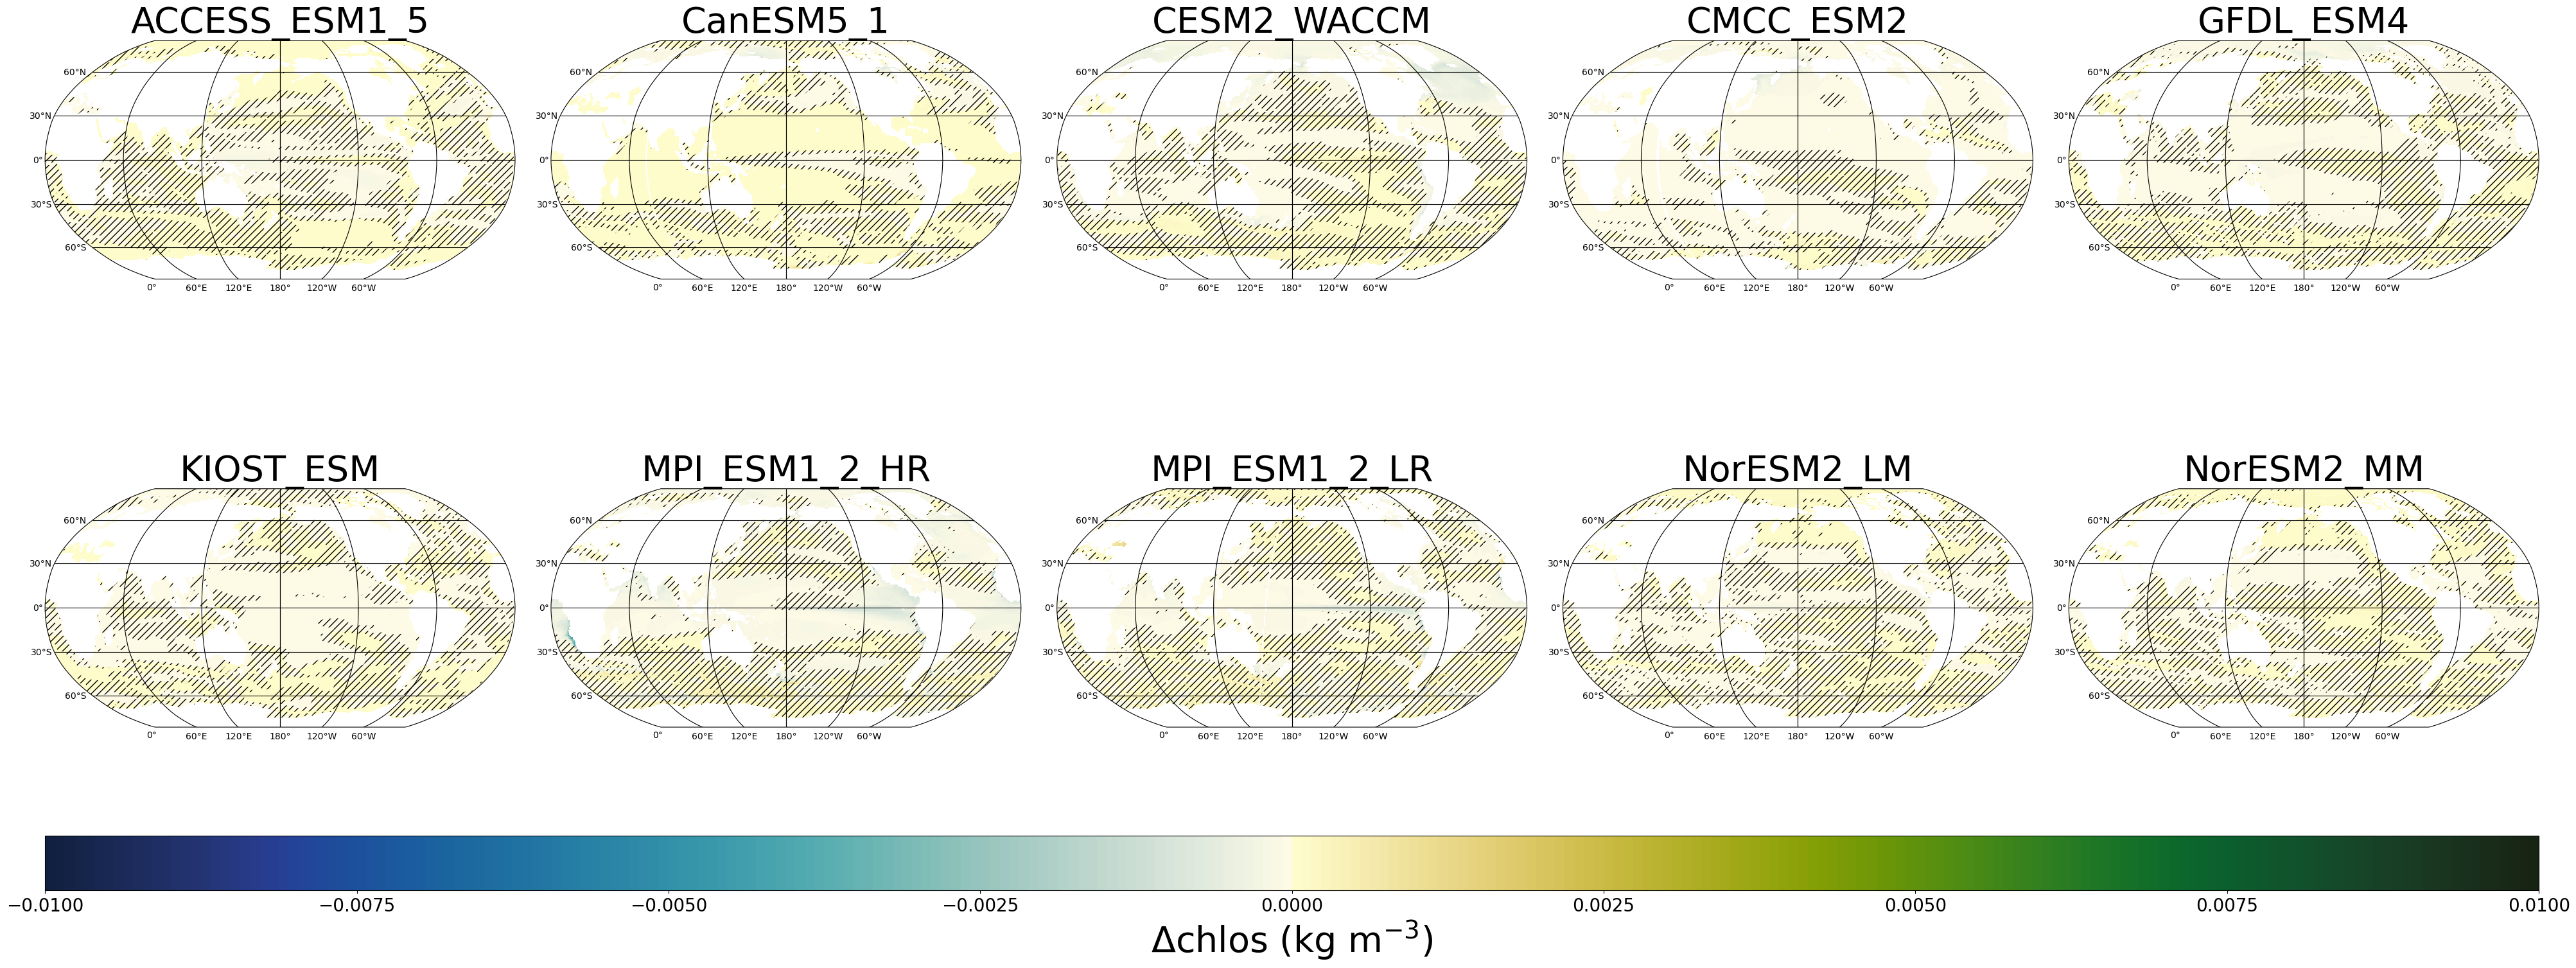

In [527]:
# Plot a figure
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cmocean import cm
from matplotlib import colors
from matplotlib.gridspec import GridSpec

# Create a figure with 2 x 5 panels (top row = first five CMIP6 models, bottom row = last five CMIP6 models)
f = plt.figure(constrained_layout=True, figsize=(40, 16))
gs = GridSpec(3, 5, figure=f, height_ratios=[4, 4, 0.5], width_ratios=[4, 4, 4, 4, 4])
ax1a = f.add_subplot(gs[0, 0], projection=ccrs.Robinson(central_longitude=180)) # ACCESS_ESM1_5
ax1b = f.add_subplot(gs[0, 1], projection=ccrs.Robinson(central_longitude=180)) # CanESM5_1
ax1c = f.add_subplot(gs[0, 2], projection=ccrs.Robinson(central_longitude=180)) # CESM2_WACCM
ax1d = f.add_subplot(gs[0, 3], projection=ccrs.Robinson(central_longitude=180)) # CMCC_ESM2
ax1e = f.add_subplot(gs[0, 4], projection=ccrs.Robinson(central_longitude=180)) # GFDL_ESM4

ax2a = f.add_subplot(gs[1, 0], projection=ccrs.Robinson(central_longitude=180)) # KIOST_ESM
ax2b = f.add_subplot(gs[1, 1], projection=ccrs.Robinson(central_longitude=180)) # MPI_ESM1_2_HR
ax2c = f.add_subplot(gs[1, 2], projection=ccrs.Robinson(central_longitude=180)) # MPI_ESM1_2_LR
ax2d = f.add_subplot(gs[1, 3], projection=ccrs.Robinson(central_longitude=180)) # NorESM2_LM
ax2e = f.add_subplot(gs[1, 4], projection=ccrs.Robinson(central_longitude=180)) # NorESM2_MM

cax1 = f.add_subplot(gs[2, :]) # Colorbar axis (chlos)

# ACCESS_ESM1_5: Plot difference in chlos
plot1a = ax1a.pcolormesh(ACCESS_ESM1_5.lon, ACCESS_ESM1_5.lat, 1000*(ACCESS_ESM1_5_end - ACCESS_ESM1_5_start),
                         vmin=-0.01, vmax=0.01, cmap=cm.delta, transform=ccrs.PlateCarree(), zorder=0)
ax1a.contourf(ACCESS_ESM1_5.lon, ACCESS_ESM1_5.lat, ACCESS_ESM1_5_tt.pvalue, levels=[0.0, 0.05, 1.0], colors='none', hatches=[None, '///'], 
              transform=ccrs.PlateCarree(), zorder=1)
gl1a = ax1a.gridlines(draw_labels=True, dms=True, color='k') # Add gridlines
gl1a.top_labels=False # Remove top gridlines
gl1a.right_labels=False # Remove right gridlines
ax1a.set_title('ACCESS_ESM1_5', fontsize = 40);

# CanESM5_1: Plot difference in chlos
plot1b = ax1b.pcolormesh(CanESM5_1.lon, CanESM5_1.lat, 1000*(CanESM5_1_end - CanESM5_1_start),
                         vmin=-0.01, vmax=0.01, cmap=cm.delta, transform=ccrs.PlateCarree(), zorder=0)
ax1b.contourf(CanESM5_1.lon, CanESM5_1.lat, CanESM5_1_tt.pvalue, levels=[0.0, 0.05, 1.0], colors='none', hatches=[None, '///'], 
              transform=ccrs.PlateCarree(), zorder=1)
gl1b = ax1b.gridlines(draw_labels=True, dms=True, color='k') # Add gridlines
gl1b.top_labels=False # Remove top gridlines
gl1b.right_labels=False # Remove right gridlines
ax1b.set_title('CanESM5_1', fontsize = 40);

# CESM2_WACCM: Plot difference in chlos
plot1c = ax1c.pcolormesh(CESM2_WACCM.lon, CESM2_WACCM.lat, 1000*(CESM2_WACCM_end - CESM2_WACCM_start),
                         vmin=-0.01, vmax=0.01, cmap=cm.delta, transform=ccrs.PlateCarree(), zorder=0)
ax1c.contourf(CESM2_WACCM.lon, CESM2_WACCM.lat, CESM2_WACCM_tt.pvalue, levels=[0.0, 0.05, 1.0], colors='none', hatches=[None, '///'], 
              transform=ccrs.PlateCarree(), zorder=1)
gl1c = ax1c.gridlines(draw_labels=True, dms=True, color='k') # Add gridlines
gl1c.top_labels=False # Remove top gridlines
gl1c.right_labels=False # Remove right gridlines
ax1c.set_title('CESM2_WACCM', fontsize = 40);

# CMCC_ESM2: Plot difference in chlos
plot1d = ax1d.pcolormesh(CMCC_ESM2.lon, CMCC_ESM2.lat, 1000*(CMCC_ESM2_end - CMCC_ESM2_start),
                         vmin=-0.01, vmax=0.01, cmap=cm.delta, transform=ccrs.PlateCarree(), zorder=0)
ax1d.contourf(CMCC_ESM2.lon, CMCC_ESM2.lat, CMCC_ESM2_tt.pvalue, levels=[0.0, 0.05, 1.0], colors='none', hatches=[None, '///'], 
              transform=ccrs.PlateCarree(), zorder=1)
gl1d = ax1d.gridlines(draw_labels=True, dms=True, color='k') # Add gridlines
gl1d.top_labels=False # Remove top gridlines
gl1d.right_labels=False # Remove right gridlines
ax1d.set_title('CMCC_ESM2', fontsize = 40);

# GFDL_ESM4: Plot difference in chlos
plot1e = ax1e.pcolormesh(GFDL_ESM4.lon, GFDL_ESM4.lat, 1000*(GFDL_ESM4_end - GFDL_ESM4_start),
                         vmin=-0.01, vmax=0.01, cmap=cm.delta, transform=ccrs.PlateCarree(), zorder=0)
ax1e.contourf(GFDL_ESM4.lon, GFDL_ESM4.lat, GFDL_ESM4_tt.pvalue, levels=[0.0, 0.05, 1.0], colors='none', hatches=[None, '///'], 
              transform=ccrs.PlateCarree(), zorder=1)
gl1e = ax1e.gridlines(draw_labels=True, dms=True, color='k') # Add gridlines
gl1e.top_labels=False # Remove top gridlines
gl1e.right_labels=False # Remove right gridlines
ax1e.set_title('GFDL_ESM4', fontsize = 40);

# KIOST_ESM: Plot difference in chlos
plot2a = ax2a.pcolormesh(KIOST_ESM.lon, KIOST_ESM.lat, 1000*(KIOST_ESM_end - KIOST_ESM_start),
                         vmin=-0.01, vmax=0.01, cmap=cm.delta, transform=ccrs.PlateCarree(), zorder=0)
ax2a.contourf(KIOST_ESM.lon, KIOST_ESM.lat, KIOST_ESM_tt.pvalue, levels=[0.0, 0.05, 1.0], colors='none', hatches=[None, '///'], 
              transform=ccrs.PlateCarree(), zorder=1)
gl2a = ax2a.gridlines(draw_labels=True, dms=True, color='k') # Add gridlines
gl2a.top_labels=False # Remove top gridlines
gl2a.right_labels=False # Remove right gridlines
ax2a.set_title('KIOST_ESM', fontsize = 40);

# MPI_ESM1_2_HR: Plot difference in chlos
plot2b = ax2b.pcolormesh(MPI_ESM1_2_HR.lon, MPI_ESM1_2_HR.lat, 1000*(MPI_ESM1_2_HR_end - MPI_ESM1_2_HR_start),
                         vmin=-0.01, vmax=0.01, cmap=cm.delta, transform=ccrs.PlateCarree(), zorder=0)
ax2b.contourf(MPI_ESM1_2_HR.lon, MPI_ESM1_2_HR.lat, MPI_ESM1_2_HR_tt.pvalue, levels=[0.0, 0.05, 1.0], colors='none', hatches=[None, '///'], 
              transform=ccrs.PlateCarree(), zorder=1)
gl2b = ax2b.gridlines(draw_labels=True, dms=True, color='k') # Add gridlines
gl2b.top_labels=False # Remove top gridlines
gl2b.right_labels=False # Remove right gridlines
ax2b.set_title('MPI_ESM1_2_HR', fontsize = 40);

# MPI_ESM1_2_LR: Plot difference in chlos
plot2c = ax2c.pcolormesh(MPI_ESM1_2_LR.lon, MPI_ESM1_2_LR.lat, 1000*(MPI_ESM1_2_LR_end - MPI_ESM1_2_LR_start),
                         vmin=-0.01, vmax=0.01, cmap=cm.delta, transform=ccrs.PlateCarree(), zorder=0)
ax2c.contourf(MPI_ESM1_2_LR.lon, MPI_ESM1_2_LR.lat, MPI_ESM1_2_LR_tt.pvalue, levels=[0.0, 0.05, 1.0], colors='none', hatches=[None, '///'], 
              transform=ccrs.PlateCarree(), zorder=1)
gl2c = ax2c.gridlines(draw_labels=True, dms=True, color='k') # Add gridlines
gl2c.top_labels=False # Remove top gridlines
gl2c.right_labels=False # Remove right gridlines
ax2c.set_title('MPI_ESM1_2_LR', fontsize = 40);

# NorESM2_LM: Plot difference in chlos
plot2d = ax2d.pcolormesh(NorESM2_LM.lon, NorESM2_LM.lat, 1000*(NorESM2_LM_end - NorESM2_LM_start),
                         vmin=-0.01, vmax=0.01, cmap=cm.delta, transform=ccrs.PlateCarree(), zorder=0)
ax2d.contourf(NorESM2_LM.lon, NorESM2_LM.lat, NorESM2_LM_tt.pvalue, levels=[0.0, 0.05, 1.0], colors='none', hatches=[None, '///'], 
              transform=ccrs.PlateCarree(), zorder=1)
gl2d = ax2d.gridlines(draw_labels=True, dms=True, color='k') # Add gridlines
gl2d.top_labels=False # Remove top gridlines
gl2d.right_labels=False # Remove right gridlines
ax2d.set_title('NorESM2_LM', fontsize = 40);

# NorESM2_MM: Plot difference in chlos
plot2e = ax2e.pcolormesh(NorESM2_MM.lon, NorESM2_MM.lat, 1000*(NorESM2_MM_end - NorESM2_MM_start),
                         vmin=-0.01, vmax=0.01, cmap=cm.delta, transform=ccrs.PlateCarree(), zorder=0)
ax2e.contourf(NorESM2_MM.lon, NorESM2_MM.lat, NorESM2_MM_tt.pvalue, levels=[0.0, 0.05, 1.0], colors='none', hatches=[None, '///'], 
              transform=ccrs.PlateCarree(), zorder=1)
gl2e = ax2e.gridlines(draw_labels=True, dms=True, color='k') # Add gridlines
gl2e.top_labels=False # Remove top gridlines
gl2e.right_labels=False # Remove right gridlines
ax2e.set_title('NorESM2_MM', fontsize = 40);


#plt.set_title(r'$\Delta$chlos Significance Per Model', fontsize = 40, fontname="serif", pad = 30)

cbar1 = plt.colorbar(plot1a, cax=cax1, orientation='horizontal')
cbar1.set_label(r'$\Delta$chlos (kg m$^{-3}$)', fontsize=40)
cbar1.ax.tick_params(labelsize=20);

plt.savefig('Project_Fig1', bbox_inches='tight', dpi=1000)

## Plotting proportion of models that agree on significance of change in chlos. Red dots indicate where there is a negative change. Otherwise all changes are positive.

In [490]:
import numpy as np

models_tt = [ACCESS_ESM1_5_tt, CanESM5_1_tt, CESM2_WACCM_tt, CMCC_ESM2_tt, GFDL_ESM4_tt, 
          KIOST_ESM_tt, MPI_ESM1_2_HR_tt, MPI_ESM1_2_LR_tt, NorESM2_LM_tt, NorESM2_MM_tt]

lon = np.arange(0, 180 ,1)
lat = np.arange(0, 360 ,1)

agreement_pvalue = pd.DataFrame(index=range(180), columns=range(360))

for i in lon:
    for t in lat:

        if (models_tt[0].pvalue[i][t].item() <= 0.05) + (models_tt[1].pvalue[i][t].item() <= 0.05) + (models_tt[2].pvalue[i][t].item() <= 0.05) + (models_tt[3].pvalue[i][t].item() <= 0.05) + (models_tt[4].pvalue[i][t].item() <= 0.05) + (models_tt[5].pvalue[i][t].item() <= 0.05) + (models_tt[6].pvalue[i][t].item() <= 0.05) + (models_tt[7].pvalue[i][t].item() <= 0.05) + (models_tt[8].pvalue[i][t].item() <= 0.05) + (models_tt[9].pvalue[i][t].item() <= 0.05) == 10:
             agreement_pvalue.loc[i, t] = 1.0
        if (models_tt[0].pvalue[i][t].item() <= 0.05) + (models_tt[1].pvalue[i][t].item() <= 0.05) + (models_tt[2].pvalue[i][t].item() <= 0.05) + (models_tt[3].pvalue[i][t].item() <= 0.05) + (models_tt[4].pvalue[i][t].item() <= 0.05) + (models_tt[5].pvalue[i][t].item() <= 0.05) + (models_tt[6].pvalue[i][t].item() <= 0.05) + (models_tt[7].pvalue[i][t].item() <= 0.05) + (models_tt[8].pvalue[i][t].item() <= 0.05) + (models_tt[9].pvalue[i][t].item() <= 0.05) == 9:
             agreement_pvalue.loc[i, t] = 0.9
        if (models_tt[0].pvalue[i][t].item() <= 0.05) + (models_tt[1].pvalue[i][t].item() <= 0.05) + (models_tt[2].pvalue[i][t].item() <= 0.05) + (models_tt[3].pvalue[i][t].item() <= 0.05) + (models_tt[4].pvalue[i][t].item() <= 0.05) + (models_tt[5].pvalue[i][t].item() <= 0.05) + (models_tt[6].pvalue[i][t].item() <= 0.05) + (models_tt[7].pvalue[i][t].item() <= 0.05) + (models_tt[8].pvalue[i][t].item() <= 0.05) + (models_tt[9].pvalue[i][t].item() <= 0.05) == 8:
             agreement_pvalue.loc[i, t] = 0.8
        if (models_tt[0].pvalue[i][t].item() <= 0.05) + (models_tt[1].pvalue[i][t].item() <= 0.05) + (models_tt[2].pvalue[i][t].item() <= 0.05) + (models_tt[3].pvalue[i][t].item() <= 0.05) + (models_tt[4].pvalue[i][t].item() <= 0.05) + (models_tt[5].pvalue[i][t].item() <= 0.05) + (models_tt[6].pvalue[i][t].item() <= 0.05) + (models_tt[7].pvalue[i][t].item() <= 0.05) + (models_tt[8].pvalue[i][t].item() <= 0.05) + (models_tt[9].pvalue[i][t].item() <= 0.05) == 7:
             agreement_pvalue.loc[i, t] = 0.7
        if (models_tt[0].pvalue[i][t].item() <= 0.05) + (models_tt[1].pvalue[i][t].item() <= 0.05) + (models_tt[2].pvalue[i][t].item() <= 0.05) + (models_tt[3].pvalue[i][t].item() <= 0.05) + (models_tt[4].pvalue[i][t].item() <= 0.05) + (models_tt[5].pvalue[i][t].item() <= 0.05) + (models_tt[6].pvalue[i][t].item() <= 0.05) + (models_tt[7].pvalue[i][t].item() <= 0.05) + (models_tt[8].pvalue[i][t].item() <= 0.05) + (models_tt[9].pvalue[i][t].item() <= 0.05) == 6:
             agreement_pvalue.loc[i, t] = 0.6
        if (models_tt[0].pvalue[i][t].item() <= 0.05) + (models_tt[1].pvalue[i][t].item() <= 0.05) + (models_tt[2].pvalue[i][t].item() <= 0.05) + (models_tt[3].pvalue[i][t].item() <= 0.05) + (models_tt[4].pvalue[i][t].item() <= 0.05) + (models_tt[5].pvalue[i][t].item() <= 0.05) + (models_tt[6].pvalue[i][t].item() <= 0.05) + (models_tt[7].pvalue[i][t].item() <= 0.05) + (models_tt[8].pvalue[i][t].item() <= 0.05) + (models_tt[9].pvalue[i][t].item() <= 0.05) == 5:
             agreement_pvalue.loc[i, t] = 0.5
        if (models_tt[0].pvalue[i][t].item() <= 0.05) + (models_tt[1].pvalue[i][t].item() <= 0.05) + (models_tt[2].pvalue[i][t].item() <= 0.05) + (models_tt[3].pvalue[i][t].item() <= 0.05) + (models_tt[4].pvalue[i][t].item() <= 0.05) + (models_tt[5].pvalue[i][t].item() <= 0.05) + (models_tt[6].pvalue[i][t].item() <= 0.05) + (models_tt[7].pvalue[i][t].item() <= 0.05) + (models_tt[8].pvalue[i][t].item() <= 0.05) + (models_tt[9].pvalue[i][t].item() <= 0.05) == 4:
             agreement_pvalue.loc[i, t] = 0.4
        if (models_tt[0].pvalue[i][t].item() <= 0.05) + (models_tt[1].pvalue[i][t].item() <= 0.05) + (models_tt[2].pvalue[i][t].item() <= 0.05) + (models_tt[3].pvalue[i][t].item() <= 0.05) + (models_tt[4].pvalue[i][t].item() <= 0.05) + (models_tt[5].pvalue[i][t].item() <= 0.05) + (models_tt[6].pvalue[i][t].item() <= 0.05) + (models_tt[7].pvalue[i][t].item() <= 0.05) + (models_tt[8].pvalue[i][t].item() <= 0.05) + (models_tt[9].pvalue[i][t].item() <= 0.05) == 3:
             agreement_pvalue.loc[i, t] = 0.3
        if (models_tt[0].pvalue[i][t].item() <= 0.05) + (models_tt[1].pvalue[i][t].item() <= 0.05) + (models_tt[2].pvalue[i][t].item() <= 0.05) + (models_tt[3].pvalue[i][t].item() <= 0.05) + (models_tt[4].pvalue[i][t].item() <= 0.05) + (models_tt[5].pvalue[i][t].item() <= 0.05) + (models_tt[6].pvalue[i][t].item() <= 0.05) + (models_tt[7].pvalue[i][t].item() <= 0.05) + (models_tt[8].pvalue[i][t].item() <= 0.05) + (models_tt[9].pvalue[i][t].item() <= 0.05) == 2:
             agreement_pvalue.loc[i, t] = 0.2
        if (models_tt[0].pvalue[i][t].item() <= 0.05) + (models_tt[1].pvalue[i][t].item() <= 0.05) + (models_tt[2].pvalue[i][t].item() <= 0.05) + (models_tt[3].pvalue[i][t].item() <= 0.05) + (models_tt[4].pvalue[i][t].item() <= 0.05) + (models_tt[5].pvalue[i][t].item() <= 0.05) + (models_tt[6].pvalue[i][t].item() <= 0.05) + (models_tt[7].pvalue[i][t].item() <= 0.05) + (models_tt[8].pvalue[i][t].item() <= 0.05) + (models_tt[9].pvalue[i][t].item() <= 0.05) == 1:
             agreement_pvalue.loc[i, t] = 0.1
        if (models_tt[0].pvalue[i][t].item() <= 0.05) + (models_tt[1].pvalue[i][t].item() <= 0.05) + (models_tt[2].pvalue[i][t].item() <= 0.05) + (models_tt[3].pvalue[i][t].item() <= 0.05) + (models_tt[4].pvalue[i][t].item() <= 0.05) + (models_tt[5].pvalue[i][t].item() <= 0.05) + (models_tt[6].pvalue[i][t].item() <= 0.05) + (models_tt[7].pvalue[i][t].item() <= 0.05) + (models_tt[8].pvalue[i][t].item() <= 0.05) + (models_tt[9].pvalue[i][t].item() <= 0.05) == 0:
             agreement_pvalue.loc[i, t] = 0.0

        agreement_pvalue
        
agreement_pvalue = np.array(agreement_pvalue, dtype=float)


In [545]:
import numpy as np

models_tt = [ACCESS_ESM1_5_tt, CanESM5_1_tt, CESM2_WACCM_tt, CMCC_ESM2_tt, GFDL_ESM4_tt, 
          KIOST_ESM_tt, MPI_ESM1_2_HR_tt, MPI_ESM1_2_LR_tt, NorESM2_LM_tt, NorESM2_MM_tt]

lon = np.arange(0, 180 ,1)
lat = np.arange(0, 360 ,1)

agreement_tstat = pd.DataFrame(index=range(180), columns=range(360))

for i in lon:
    for t in lat:

        if (models_tt[0].statistic[i][t].item() < 0) + (models_tt[1].statistic[i][t].item() < 0) + (models_tt[2].statistic[i][t].item() < 0) + (models_tt[3].statistic[i][t].item() < 0) + (models_tt[4].statistic[i][t].item() < 0) + (models_tt[5].statistic[i][t].item() < 0) + (models_tt[6].statistic[i][t].item() < 0) + (models_tt[7].statistic[i][t].item() < 0) + (models_tt[8].statistic[i][t].item() < 0) + (models_tt[9].statistic[i][t].item() < 0):
             agreement_tstat.loc[i, t] = -1.0
        if (models_tt[0].statistic[i][t].item() > 0) + (models_tt[1].statistic[i][t].item() > 0) + (models_tt[2].statistic[i][t].item() > 0) + (models_tt[3].statistic[i][t].item() > 0) + (models_tt[4].statistic[i][t].item() > 0) + (models_tt[5].statistic[i][t].item() > 0) + (models_tt[6].statistic[i][t].item() > 0) + (models_tt[7].statistic[i][t].item() > 0) + (models_tt[8].statistic[i][t].item() > 0) + (models_tt[9].statistic[i][t].item() > 0):
             agreement_tstat.loc[i, t] = 1.0

        agreement_tstat
        
agreement_tstat = np.array(agreement_tstat, dtype=float)

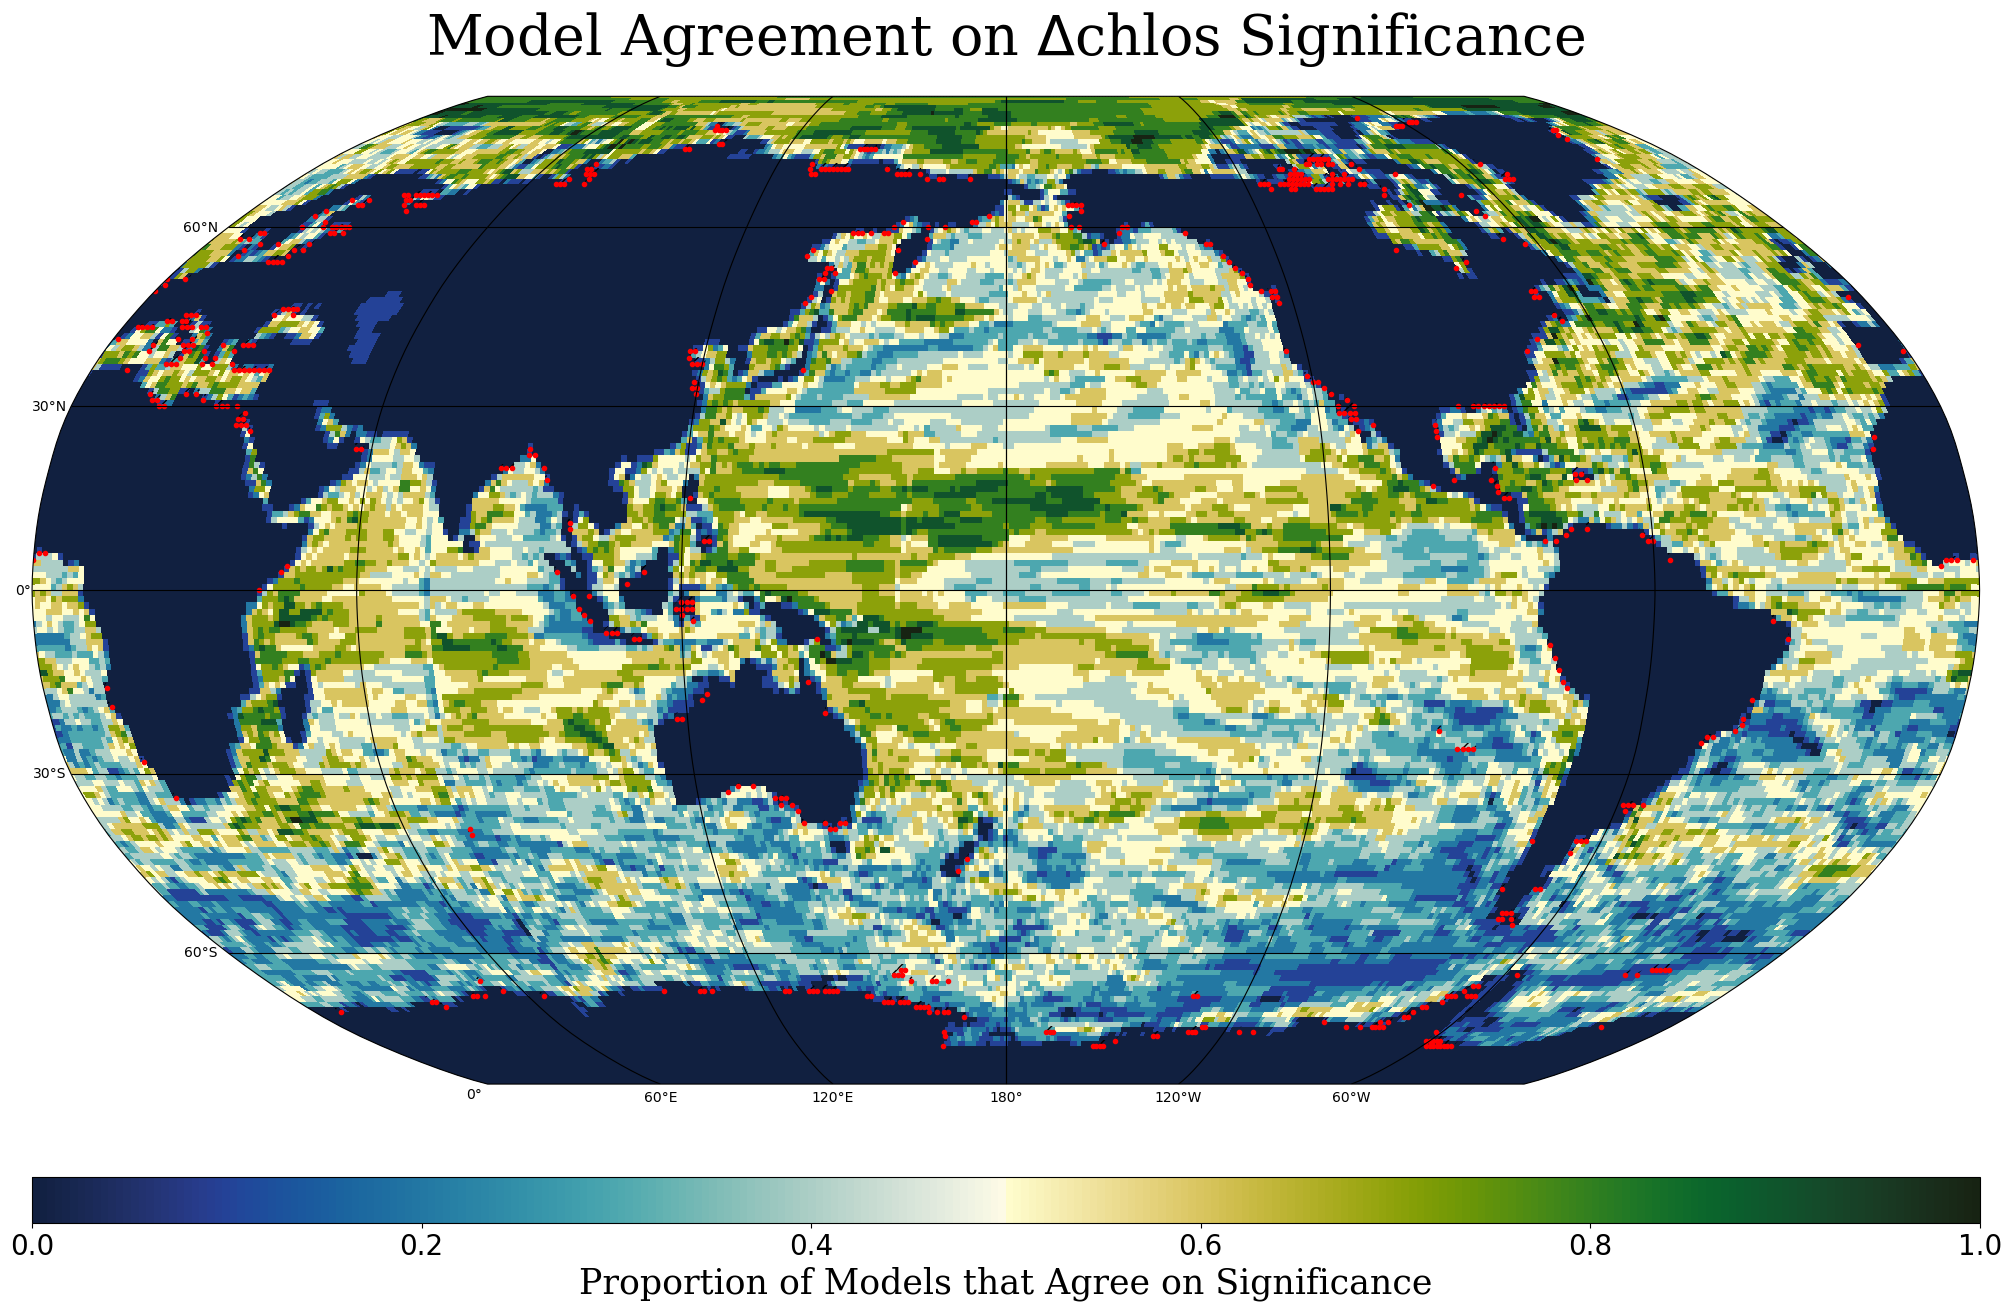

In [618]:
# Plot a figure
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cmocean import cm
from matplotlib import colors
from matplotlib.gridspec import GridSpec

f = plt.figure(constrained_layout=True, figsize=(20, 13))
gs = GridSpec(2, 1, figure=f, height_ratios=[10, 0.4], width_ratios=[10])
ax1a = f.add_subplot(gs[0, 0], projection=ccrs.Robinson(central_longitude=180))
cax1 = f.add_subplot(gs[1, :]) # Colorbar axis (chlos)


# ---------------------
plot1a = ax1a.pcolormesh(ACCESS_ESM1_5.lon, ACCESS_ESM1_5.lat, agreement_pvalue,
                         vmin=0, vmax=1, cmap=cm.delta, transform=ccrs.PlateCarree(), zorder=0)

ax1a.contourf(ACCESS_ESM1_5.lon, ACCESS_ESM1_5.lat, agreement_tstat, levels=[-1.0, 0.0, 1.0], colors='none', hatches=['///', ''], 
              transform=ccrs.PlateCarree(), zorder=1)

for i in lon:
    for t in lat:
        if agreement_tstat[i][t] == -1.0:
            ax1a.plot(t, i-90, marker='o', color='red', markersize=3, transform=ccrs.PlateCarree(), zorder=2)

gl1a = ax1a.gridlines(draw_labels=True, dms=True, color='k') # Add gridlines
gl1a.top_labels=False # Remove top gridlines
gl1a.right_labels=False # Remove right gridlines
ax1a.set_title(r'Model Agreement on $\Delta$chlos Significance', fontsize = 40, fontname="serif", pad = 30)

cbar1 = plt.colorbar(plot1a, cax=cax1, orientation='horizontal')
cbar1.set_label('Proportion of Models that Agree on Significance', fontname="serif", fontsize = 25)
cbar1.ax.tick_params(labelsize=20);

plt.savefig('Project_Fig2', bbox_inches='tight', dpi=1000)


## Ignore Code Below

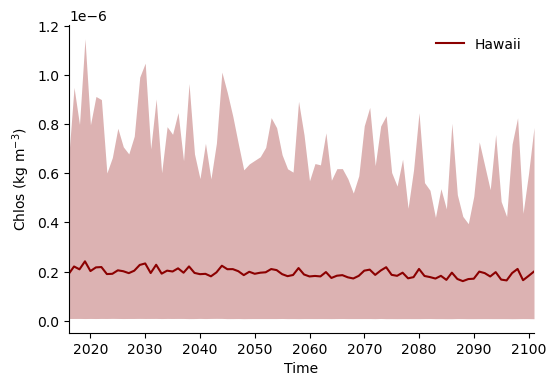

In [305]:
import matplotlib.pyplot as plt

# Plot data
f, ax = plt.subplots(1, 1, figsize=(6, 4))

# Plot the multi-model mean and model range
for site, color in zip(site_list, ['darkred']):
    ax.fill_between(chlos_sites.time, chlos_sites.loc[:, :, site].min(dim='model'), 
                    chlos_sites.loc[:, :, site].max(dim='model').resample(time='1YE').mean(), color=color, lw=0, alpha=0.3) # Multi-model mean
    ax.plot(chlos_sites.time, chlos_sites.loc[:, :, site].mean(dim='model').resample(time='1YE').mean(), label=site, c=color) # Multi-model range

ax.legend(frameon=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim([datetime(year=2016, month=1, day=31), datetime(year=2100, month=12, day=31)]) # Remove annoying gaps on left and right

ax.set_xlabel('Time')
ax.set_ylabel('Chlos (kg m$^{-3}$)');

In [303]:
import numpy as np
import pandas as pd
from datetime import datetime

site_coords = pd.DataFrame(data={'site_name': ['Hawaii'], 'latitude': [19.4], 'longitude': [156.4]})
site_list = site_coords.site_name
time_axis = pd.date_range(start=datetime(year=2015, month=1, day=31), end=datetime(year=2100, month=12, day=31), freq='1YE') # Create time axis from scratch (CMIP6 model time axis can cause issues)
chlos_sites = xr.DataArray(data=np.zeros((len(chlos_dict[models[0]].resample(time='1YE').mean().time), len(models), len(site_coords))), # time * model * site
                         dims=['time', 'model', 'site'], coords={'time': time_axis, 'model': models, 'site': site_coords.site_name})

# Now we'll interpolate the chlos at the three sites for the five models
lons = xr.DataArray(data=site_coords.longitude, coords={'site': site_list}, dims=['site'])
lats = xr.DataArray(data=site_coords.latitude, coords={'site': site_list}, dims=['site'])

for model in models:
    # One thing to be careful about here is that lon/lat can sometimes have different names in different CMIP models (although that's not the case here)
    chlos_sites.loc[:, model, :] = chlos_dict[model].resample(time='1YE').mean().interp(lon=lons, lat=lats, method='linear').data # Adding .data extracts the pure data from the DataArray
                                                                                                                              # This is important because the time axis may be slightly
                                                                                                                              # inconsistent between the different models (depending on
                                                                                                                              # what date they choose to symbolise the monthly means
                                                                                                                              # with). Removing .data would result in an error from xarray
                                                                                                                              # complaining about an inconsistent time axis.

                                                                                                                              # Also, .resample(time='1YE').mean() does effectively the same
                                                                                                                              # thing as the .groupby('time.year').mean() in the previous
                                                                                                                              # question.

In [291]:
import xarray as xr
from glob import glob

# Define file handles
models = ['ACCESS-ESM1-5', 'CanESM5-1', 'CESM2-WACCM', 'CMCC-ESM2', 'GFDL-ESM4', 
          'KIOST-ESM', 'MPI-ESM1-2-HR', 'MPI-ESM1-2-LR', 'NorESM2-LM', 'NorESM2-MM']

# Import files into xarray with a dictionary
chlos_dict = {}

for model in models:
    print(model)
    chlos_dict[model] = xr.open_mfdataset(glob('Project_Data/chlos_Omon*' + model + '*_ssp245_*.nc'), combine='by_coords').chlos

ACCESS-ESM1-5
CanESM5-1
CESM2-WACCM
CMCC-ESM2
GFDL-ESM4
KIOST-ESM
MPI-ESM1-2-HR
MPI-ESM1-2-LR
NorESM2-LM
NorESM2-MM
